# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [6]:
import pandas as pd
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [7]:
df = pd.read_csv("craftcans.csv",na_values="Does not apply")

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'craftcans.csv'

## How many rows do you have in the data? What are the column types?

In [3]:
df.tail()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85
2415,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.50%,65


In [4]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [5]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts().sort_values(ascending=False)

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
         ... 
0.10%       1
10.00%      1
3.40%       1
10.40%      1
12.00%      1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV.describe()

count      2348
unique       74
top       5.00%
freq        215
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df['ABV'] = df.ABV.str.replace('%' ,'')


# Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df['ABV'] = df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df.ABV.mean()

5.977342419080068

In [11]:
df.ABV.median()

5.6

<AxesSubplot:>

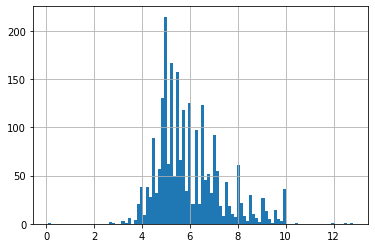

In [12]:
df.ABV.hist(bins=100)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [13]:
beer_null_ABV = sum(df.ABV.isnull())
beer_not_null_ABV = sum(df.ABV.notnull())
print(f'Missing ABV {beer_null_ABV}. Beer ABV not missing: {beer_not_null_ABV}')


Missing ABV 68. Beer ABV not missing: 2348


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [14]:
df.columns

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [15]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [16]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [24]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [28]:
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts().head(5)

American IPA       4
Rye Beer           2
Cream Ale          2
German Pilsener    2
Baltic Porter      2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [19]:
df[df['Location'].str.contains('NY', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [31]:
df[df['Location'].str.contains('NY', na=False)].count()

Beer        74
Brewery     74
Location    74
Style       74
Size        74
ABV         73
IBUs        74
dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [21]:
df[df['Style'].str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [36]:
df.IBUs.mean()

TypeError: can only concatenate str (not "int") to str

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [64]:
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

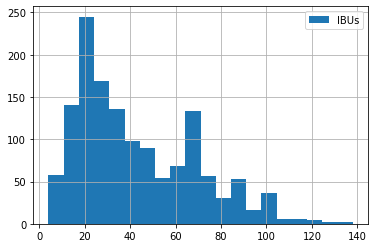

In [80]:
df.IBUs.hist(bins=20, legend=True)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [88]:
df[df['IBUs'] > df.IBUs.quantile(.75)].sort_values(by=['IBUs'],ascending=False)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.20%,138.0
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.90%,135.0
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.00%,130.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.90%,126.0
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.00%,120.0
...,...,...,...,...,...,...,...
1256,Heal the Bay IPA,Golden Road Brewing,"Los Angeles, CA",American IPA,16 oz.,6.80%,65.0
1214,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.50%,65.0
1173,Falling Down Brown Ale,Old Forge Brewing Company,"Danville, PA",American Brown Ale,16 oz.,6.50%,65.0
1871,Dale's Pale Ale (2002),Oskar Blues Brewery,"Lyons, CO",American Pale Ale (APA),12 oz.,6.50%,65.0


## List all of the beers with IBUs below the 25th percentile

In [89]:
df[df['IBUs'] < df.IBUs.quantile(.25)].sort_values(by=['IBUs'],ascending=True)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.60%,4.0
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.60%,4.0
2339,Summer Solstice (2011),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.60%,4.0
1903,Devils Tramping Ground Tripel,Aviator Brewing Company,"Fuquay-Varina, NC",Tripel,12 oz.,9.20%,5.0
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.40%,5.0
...,...,...,...,...,...,...,...
1263,Sanitas Saison Ale,Sanitas Brewing Company,"Boulder, CO",Saison / Farmhouse Ale,12 oz.,5.80%,20.0
1265,Double D Blonde (2013),Hop Valley Brewing Company,"Springfield, OR",American Blonde Ale,12 oz.,4.90%,20.0
1313,UFO Pumpkin,Harpoon Brewery,"Boston, MA",Pumpkin Ale,12 oz.,5.90%,20.0
1204,Parcae Belgian Style Pale Ale,Fate Brewing Company,"Boulder, CO",Belgian Pale Ale,16 oz.,5.00%,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [106]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

In [4]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=False).plot(x='Style', figsize=(20, 10), kind='bar',)

NameError: name 'df' is not defined

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [169]:
df[df.IBUs > 64].Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [173]:
df[df.IBUs < 21].Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [3]:
df.groupby('Style').IBUs

NameError: name 'df' is not defined

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.